In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from pickle import dump, load

- [Data link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data)
- [Data codebook](https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf)


In [3]:
orig_df = pd.read_csv('heart_2020_cleaned.csv')
display(orig_df.head())
orig_df.shape


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


(319795, 18)

In [4]:
orig_df.sort_values(by="BMI", ascending=False).head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
126896,No,94.85,No,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Excellent,7.0,No,No,No
242834,No,94.66,No,No,No,4.0,0.0,No,Female,50-54,White,No,No,Very good,6.0,No,No,No
104267,No,93.97,Yes,No,No,20.0,25.0,Yes,Female,50-54,White,No,No,Poor,6.0,No,No,No
249715,No,93.86,Yes,Yes,No,30.0,30.0,Yes,Female,65-69,Other,Yes,No,Poor,4.0,Yes,Yes,No
156093,No,92.53,Yes,No,No,7.0,0.0,Yes,Female,65-69,Black,Yes,Yes,Poor,8.0,Yes,No,No
126661,No,91.82,No,No,No,0.0,2.0,No,Female,65-69,Black,No,Yes,Very good,5.0,No,No,No
114087,No,91.55,No,No,No,0.0,10.0,Yes,Female,55-59,Other,No,No,Excellent,2.0,No,No,No
105476,No,91.55,Yes,No,No,0.0,0.0,No,Male,40-44,Other,No,Yes,Excellent,5.0,No,No,No
229007,No,88.60,No,No,No,30.0,0.0,Yes,Male,55-59,White,No,Yes,Fair,5.0,No,No,No
290183,No,88.19,No,No,No,0.0,0.0,Yes,Male,80 or older,White,No,No,Poor,8.0,No,Yes,No


In [5]:
orig_df[['AgeCategory', 'Sex']].groupby('AgeCategory', observed=True).head()

,AgeCategory,Sex
0,55-59,Female
1,80 or older,Female
2,65-69,Male
3,75-79,Female
4,40-44,Female
...,...,...
773,30-34,Male
828,18-24,Female
881,30-34,Female
1104,25-29,Male


In [6]:
df = orig_df.copy()

target = 'HeartDisease'
categorical_features = []
numeric_features = []

# Get all column names
features = df.columns.to_numpy().tolist()

# Separate categorical and numeric features
for col in features:
    if df[col].dtype != 'object': 
        if col != target:
            numeric_features.append(col)
    else:
        categorical_features.append(col)
        
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(list(df[col].astype(str).values))

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


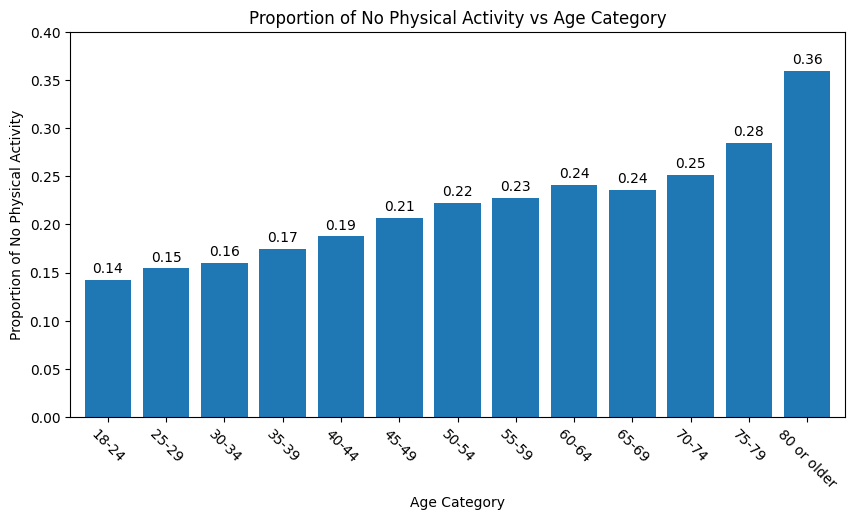

In [7]:
temp_df = pd.concat([orig_df['AgeCategory'], df['PhysicalActivity']], axis=1)
age_heartdisease = temp_df.groupby('AgeCategory', observed=True).value_counts().unstack()

age_heartdisease = age_heartdisease.div(age_heartdisease.sum(axis=1), axis=0).set_axis(['No', 'Yes'], axis=1)

ax = age_heartdisease['No'].plot(kind='bar', figsize=(10, 5), width=0.8)

ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, fmt='%.2f', padding=3, rotation=0)

plt.xticks(rotation=-45)
plt.ylim(0, 0.4)
plt.xlabel('Age Category')
plt.ylabel('Proportion of No Physical Activity')
plt.title('Proportion of No Physical Activity vs Age Category')

plt.savefig('imgs/no_physical_activity_proportion_vs_age_category.png', bbox_inches='tight', dpi=300)

plt.show()

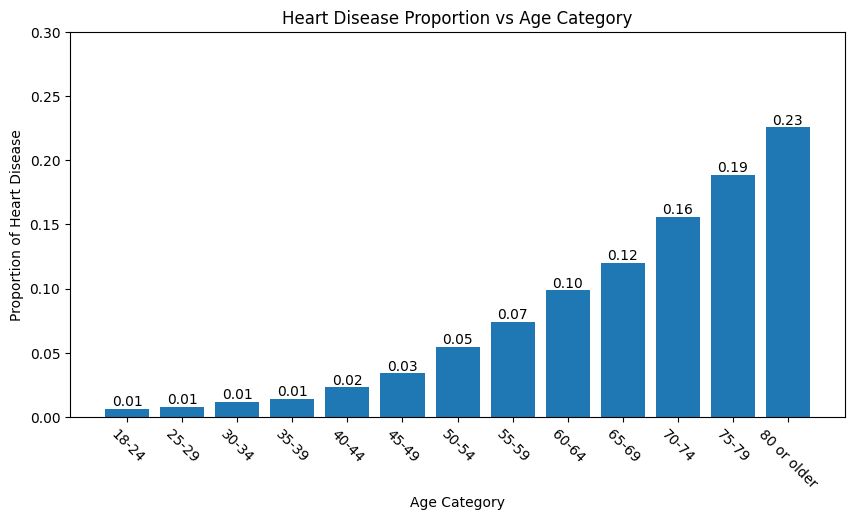

In [8]:
temp_df = pd.concat([orig_df['AgeCategory'], df[target]], axis=1)
age_heartdisease = temp_df.groupby('AgeCategory').mean()

plt.figure(figsize=(10, 5))
bar = plt.bar(age_heartdisease.index, age_heartdisease['HeartDisease'])
plt.xticks(rotation=-45)
plt.xlabel('Age Category')
plt.ylabel('Proportion of Heart Disease')
plt.ylim(0, 0.3)
plt.title('Heart Disease Proportion vs Age Category')
plt.bar_label(bar, fmt='%.2f')

plt.savefig('imgs/heart_disease_vs_age_category.png', bbox_inches='tight')

plt.show()

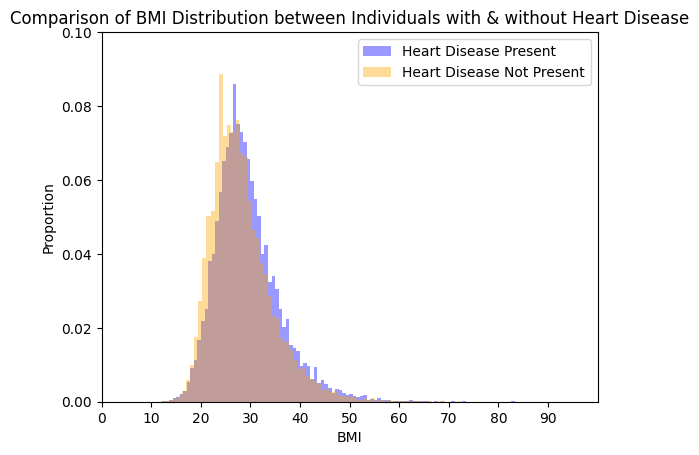

In [9]:
bmi_hd = df[['BMI', 'HeartDisease']]
HD_Yes = bmi_hd[bmi_hd['HeartDisease'] == 1]
HD_No = bmi_hd[bmi_hd['HeartDisease'] == 0]

plt.hist(HD_Yes["BMI"], bins=100, alpha=0.4, label="Heart Disease Present", color="blue", density = True)
plt.hist(HD_No["BMI"], bins=100, alpha=0.4, label="Heart Disease Not Present", color="orange", density = True)
plt.xlabel("BMI")
plt.ylabel("Proportion")
plt.xlim(0, 100)
plt.ylim(0, 0.10)
plt.xticks(np.arange(0, 100, 10))
plt.title("Comparison of BMI Distribution between Individuals with & without Heart Disease")
plt.legend()
plt.show()


HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

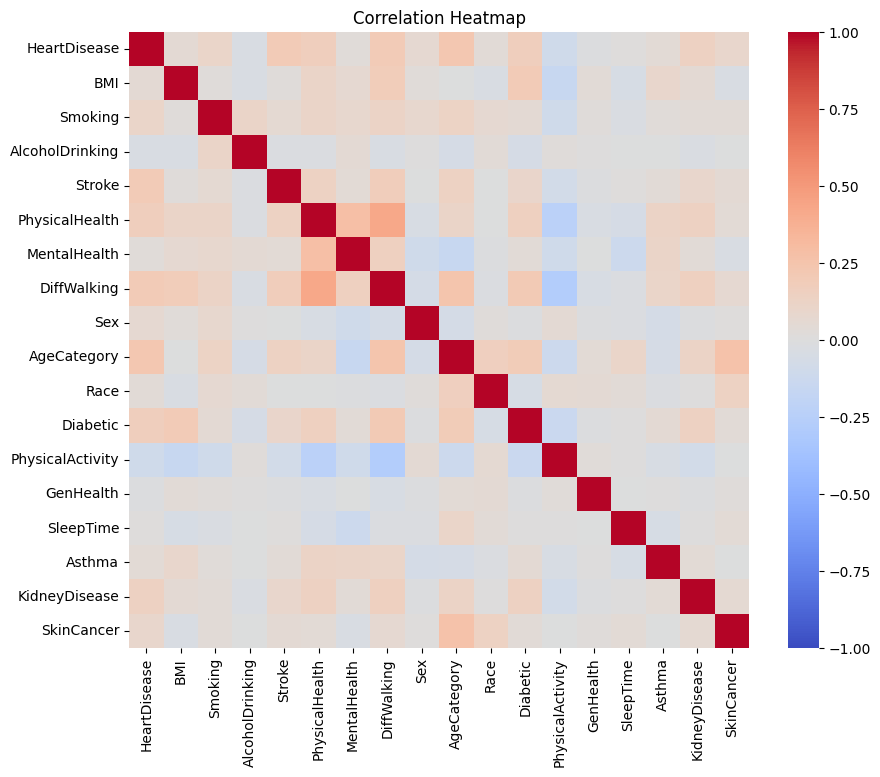

In [10]:
heart_disease_corr = df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)
display(heart_disease_corr)

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.savefig('imgs/heatmap.png', bbox_inches='tight')

plt.show()

In [11]:
heart_disease_corr.to_frame().loc[heart_disease_corr.index.isin(categorical_features)]

,HeartDisease
HeartDisease,1.000000
AgeCategory,0.233432
DiffWalking,0.201258
Stroke,0.196835
Diabetic,0.168553
KidneyDisease,0.145197
Smoking,0.107764
SkinCancer,0.093317
Sex,0.070040
Asthma,0.041444


In [12]:
heart_disease_corr.to_frame().loc[heart_disease_corr.index.isin(numeric_features)]

,HeartDisease
PhysicalHealth,0.170721
BMI,0.051803
MentalHealth,0.028591
SleepTime,0.008327


In [13]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

Limits: [12.945, 42.505]
10396 outliers out of 319795 data points
Outlier percentage: 3.251%


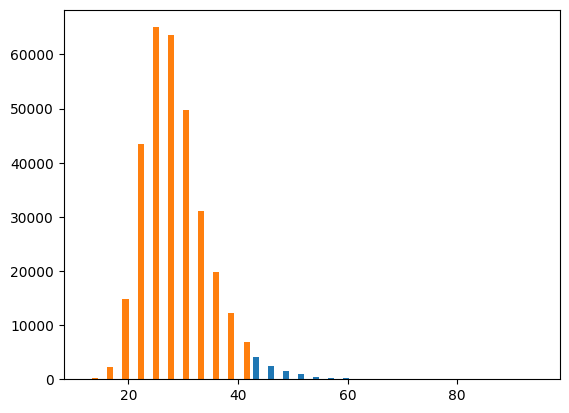

In [14]:
bmi = df['BMI']
upper = bmi.quantile(0.75)
lower = bmi.quantile(0.25)
iqr = upper - lower
upper_limit = upper + 1.5 * iqr
lower_limit = lower - 1.5 * iqr

print(f'Limits: [{lower_limit}, {upper_limit}]')

bmi_outliers = bmi[(bmi > upper_limit) | (bmi < lower_limit)]
bmi_normal = bmi[(bmi <= upper_limit) & (bmi >= lower_limit)]

print(f'{len(bmi_outliers)} outliers out of {df.shape[0]} data points')

print(f'Outlier percentage: {len(bmi_outliers)/df.shape[0]*100:.3f}%')

plt.hist([bmi_outliers, bmi_normal], bins=30)
plt.show()


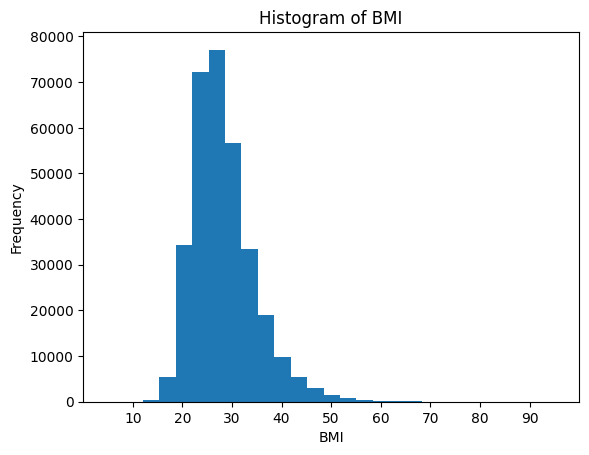

In [15]:
plt.hist(df['BMI'], bins=25)

plt.xlim(0, 100)
plt.xticks(np.arange(10, 100, 10))

plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

In [16]:
orig_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [17]:
orig_df['BMI'].median()

27.34

In [18]:
X = sm.add_constant(df.drop(target, axis=1))
Y = df[target]

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2840.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:53:04   Log-Likelihood:                -23929.
No. Observations:              319795   AIC:                         4.789e+04
Df Residuals:                  319777   BIC:                         4.809e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0711      0.004    -18.151      0.000      -0.079      -0.063
BMI               4.687e-05    7.6e-05      0.617      0.537      -0.000       0.000
Smoking              0.0258      0.001     26.641      0.000       0.024       0.028
AlcoholDrinking     -0.0172      0.002     -9.267      0.000      -0.021      -0.014
Stroke               0.1924      0.002     77.401      0.000       0.188       0.197
PhysicalHealth       0.0024   6.75e-05     35.162      0.000       0.002       0.003
MentalHealth         0.0005    6.3e-05      7.632      0.000       0.000       0.001
DiffWalking          0.0579      0.002     36.639      0.000       0.055       0.061
Sex                  0.0504      0.001     53.523      0.000       0.049       0.052
AgeCategory          0.0124      0.000     83.688      0.000       0.012       0.013
Race                 0.0021      0.000      5.362      0.000       0.001       0.003
Diabetic             0.0321      0.001     46.886      0.000       0.031       0.033
PhysicalActivity    -0.0100      0.001     -8.485      0.000      -0.012      -0.008
GenHealth           -0.0019      0.000     -6.285      0.000      -0.002      -0.001
SleepTime        -7.526e-05      0.000     -0.231      0.817      -0.001       0.001
Asthma               0.0215      0.001     15.549      0.000       0.019       0.024
KidneyDisease        0.1123      0.003     44.664      0.000       0.107       0.117
SkinCancer           0.0261      0.002     15.765      0.000       0.023       0.029
==============================================================================
Omnibus:                   154212.278   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           725946.424
Skew:                           2.425   Prob(JB):                         0.00
Kurtosis:                       8.564   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
def test_gate(df: pd.DataFrame, start, stop, step):
    gates, rsquared = np.arange(start, stop, step), []
    for gate in gates:
        heart_disease_corr = df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)
        keep_cols = heart_disease_corr[(heart_disease_corr > gate) | (heart_disease_corr < -gate)].drop(target, axis=0).index.to_numpy().tolist()
        X = sm.add_constant(df[keep_cols])
        Y = df[target]

        model = sm.OLS(Y, X).fit().rsquared
        
        rsquared.append(model)
    
    return gates, rsquared

# tg = test_gate(df, 0, 0.25, 0.01)

# dump(tg, open('tg.pkl', 'wb'))


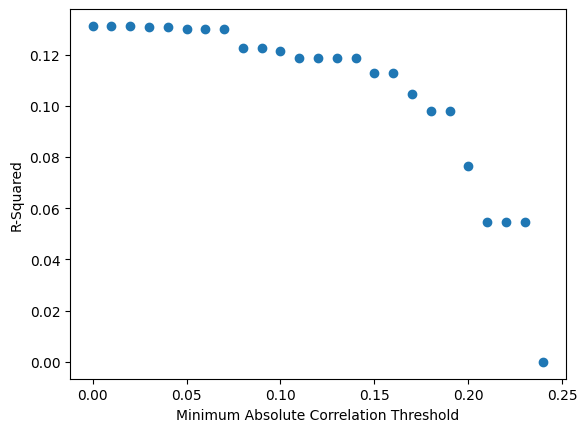

In [20]:
tg = load(open('tg.pkl', 'rb'))

plt.scatter(tg[0], tg[1])
plt.xlabel('Minimum Absolute Correlation Threshold')
plt.ylabel('R-Squared')

plt.savefig('imgs/correlation_threshold_vs_r_squared.png', bbox_inches='tight')

plt.show()

In [21]:
print(max(tg[1]))


0.13117995392323178


In [22]:
X = df.drop(["HeartDisease", "BMI", "GenHealth", "AlcoholDrinking", "SleepTime", "Race", "MentalHealth",],axis = 1)

Xfull = sm.add_constant(X)

Y = df["HeartDisease"]
model = sm.OLS(Y, Xfull).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     4368.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:53:04   Log-Likelihood:                -24030.
No. Observations:              319795   AIC:                         4.808e+04
Df Residuals:                  319783   BIC:                         4.821e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0643      0.002    -41.741      0.000      -0.067      -0.061
Smoking              0.0255      0.001     26.589      0.000       0.024       0.027
Stroke               0.1928      0.002     77.613      0.000       0.188       0.198
PhysicalHealth       0.0025   6.55e-05     38.357      0.000       0.002       0.003
DiffWalking          0.0590      0.002     37.728      0.000       0.056       0.062
Sex                  0.0500      0.001     53.413      0.000       0.048       0.052
AgeCategory          0.0123      0.000     86.607      0.000       0.012       0.013
Diabetic             0.0323      0.001     47.963      0.000       0.031       0.034
PhysicalActivity    -0.0101      0.001     -8.662      0.000      -0.012      -0.008
Asthma               0.0220      0.001     16.016      0.000       0.019       0.025
KidneyDisease        0.1128      0.003     44.876      0.000       0.108       0.118
SkinCancer           0.0268      0.002     16.235      0.000       0.024       0.030
==============================================================================
Omnibus:                   154422.030   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728421.105
Skew:                           2.428   Prob(JB):                         0.00
Kurtosis:                       8.576   Cond. No.                         53.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = df[["BMI", "Smoking", "AlcoholDrinking", "PhysicalHealth", "AgeCategory", "PhysicalActivity"]]
 

Xfull = sm.add_constant(X)


Y = df["HeartDisease"]
model = sm.OLS(Y, Xfull).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     4805.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:53:05   Log-Likelihood:                -32612.
No. Observations:              319795   AIC:                         6.524e+04
Df Residuals:                  319788   BIC:                         6.531e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0696      0.003    -25.581      0.000      -0.075      -0.064
BMI                  0.0014   7.57e-05     18.112      0.000       0.001       0.002
Smoking              0.0370      0.001     37.571      0.000       0.035       0.039
AlcoholDrinking     -0.0257      0.002    -13.504      0.000      -0.029      -0.022
PhysicalHealth       0.0045   6.19e-05     73.182      0.000       0.004       0.005
AgeCategory          0.0161      0.000    118.882      0.000       0.016       0.016
PhysicalActivity    -0.0226      0.001    -19.042      0.000      -0.025      -0.020
==============================================================================
Omnibus:                   162461.140   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           779574.913
Skew:                           2.583   Prob(JB):                         0.00
Kurtosis:                       8.640   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""